## Pandas

#### Agrupamientos

In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/DELL/Documents/appl.csv', usecols=['Date','Open','Close','Adj Close'])

In [2]:
data['gap_positivo']=data.Open > data['Close'].shift()
data

,Date,Open,Close,Adj Close,gap_positivo
0,02-01-18,170.160004,172.259995,168.339050,False
1,03-01-18,172.529999,172.229996,168.309738,True
2,04-01-18,172.539993,173.029999,169.091522,True
3,05-01-18,173.440002,175.000000,171.016678,True
4,08-01-18,174.350006,174.350006,170.381485,False


In [3]:
data.groupby('gap_positivo').size()

gap_positivo
False    2
True     3
dtype: int64

In [4]:
import pandas as pd
data = {'Compania':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Mes':['Ene','Feb','Ene','Feb','Ene','Feb'],
       'Ventas':[200,120,340,124,243,350]}
df = pd.DataFrame(data)

In [6]:
df

,Compania,Mes,Ventas
0,GOOG,Ene,200
1,GOOG,Feb,120
2,MSFT,Ene,340
3,MSFT,Feb,124
4,FB,Ene,243
5,FB,Feb,350


In [8]:
total_ventas = df.groupby('Compania')

In [9]:
total_ventas

In [10]:
total_ventas.sum()

,Ventas
Compania,
FB,593
GOOG,320
MSFT,464


In [11]:
total_ventas.mean()

,Ventas
Compania,
FB,296.5
GOOG,160.0
MSFT,232.0


In [12]:
total_ventas.std()

,Ventas
Compania,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [14]:
df.groupby('Mes').sum()

,Ventas
Mes,
Ene,783
Feb,594


In [16]:
df.groupby('Compania').describe()

Ventas                                                        
          count   mean         std    min     25%    50%     75%    max
Compania                                                               
FB          2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG        2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT        2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [17]:
df.groupby('Compania').describe().transpose()

Compania              FB        GOOG        MSFT
Ventas count    2.000000    2.000000    2.000000
       mean   296.500000  160.000000  232.000000
       std     75.660426   56.568542  152.735065
       min    243.000000  120.000000  124.000000
       25%    269.750000  140.000000  178.000000
       50%    296.500000  160.000000  232.000000
       75%    323.250000  180.000000  286.000000
       max    350.000000  200.000000  340.000000

## NaN -> not a number -> cero, vacio, no numero

In [24]:
data = pd.read_excel('C:/Users/DELL/Documents/AAPL.xlsx', index_col=0)

In [25]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.55,NaN,172.229996,168.309738,29517900
2018-01-04,172.539993,NaN,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800


In [26]:
data['var']=round(data['Low'].pct_change()*100,2)

In [27]:
data

,Open,High,Low,Close,Adj Close,Volume,var
Date,,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900,NaN
2018-01-03,172.529999,174.55,NaN,172.229996,168.309738,29517900,0.00
2018-01-04,172.539993,NaN,172.080002,173.029999,169.091522,22434600,1.67
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000,0.56
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800,0.51


In [28]:
#Para saber cuantas celdas no tienen valor
data.isnull().sum()

Open         0
High         1
Low          1
Close        0
Adj Close    0
Volume       0
var          1
dtype: int64

In [29]:
data.isnull()

,Open,High,Low,Close,Adj Close,Volume,var
Date,,,,,,,
2018-01-02,False,False,False,False,False,False,True
2018-01-03,False,False,True,False,False,False,False
2018-01-04,False,True,False,False,False,False,False
2018-01-05,False,False,False,False,False,False,False
2018-01-08,False,False,False,False,False,False,False


In [30]:
#dropna() elimina las filas que tienen los NaN
#fillna(x) Cambia los NaN por el valor x
#replace(x,y) Buscar los valores X y los reemplaza por Y
data2 = data.dropna()

In [31]:
data2

,Open,High,Low,Close,Adj Close,Volume,var
Date,,,,,,,
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000,0.56
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800,0.51


In [34]:
data2 = data.copy()

In [35]:
data2

,Open,High,Low,Close,Adj Close,Volume,var
Date,,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900,NaN
2018-01-03,172.529999,174.55,NaN,172.229996,168.309738,29517900,0.00
2018-01-04,172.539993,NaN,172.080002,173.029999,169.091522,22434600,1.67
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000,0.56
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800,0.51


In [36]:
data2.dropna(inplace=True)

In [37]:
data2

,Open,High,Low,Close,Adj Close,Volume,var
Date,,,,,,,
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000,0.56
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800,0.51


In [38]:
#FillNA
data = pd.read_excel('C:/Users/DELL/Documents/AAPL.xlsx', index_col=0)
data.fillna(0)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.55,0.000000,172.229996,168.309738,29517900
2018-01-04,172.539993,0,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800


In [39]:
data # como no puse inplace=True no guardo los cambios en el DF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.55,NaN,172.229996,168.309738,29517900
2018-01-04,172.539993,NaN,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800


In [40]:
data.fillna(0, inplace=True)

In [41]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.55,0.000000,172.229996,168.309738,29517900
2018-01-04,172.539993,0,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800


In [42]:
data = pd.read_excel('C:/Users/DELL/Documents/AAPL.xlsx', index_col=0)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.55,NaN,172.229996,168.309738,29517900
2018-01-04,172.539993,NaN,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800


In [45]:
data['Low'].fillna(data['Low'].mean())

Date
2018-01-02    169.259995
2018-01-03    172.079998
2018-01-04    172.080002
2018-01-05    173.050003
2018-01-08    173.929993
Name: Low, dtype: float64

In [46]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.3,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.55,NaN,172.229996,168.309738,29517900
2018-01-04,172.539993,NaN,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,Texto,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.61,173.929993,174.350006,170.381485,20567800


In [47]:
data['High'].fillna(data['High'].mean())

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [50]:
## Reemplazar
data.replace('Texto',0,inplace=True)

In [51]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.550003,NaN,172.229996,168.309738,29517900
2018-01-04,172.539993,NaN,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,0.000000,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,170.381485,20567800


## Aplicar funciones a dataframe

In [52]:
def cuadrado(x):
    return x**2

In [53]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})

In [54]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [55]:
df['col1'].apply(cuadrado)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [57]:
df2= df['col1'].apply(cuadrado)

In [58]:
df2

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

## Medias Moviles

In [59]:
data = pd.read_csv('C:/Users/DELL/Documents/UI.csv', index_col=0)

In [60]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,154.970001,155.000000,150.889999,153.559998,152.546036,84800
2020-04-14,157.699997,161.500000,156.979996,160.570007,159.509766,107200
2020-04-15,158.210007,158.210007,151.259995,152.110001,151.105621,143400
2020-04-16,153.080002,154.869995,151.789993,153.770004,152.754669,90300
2020-04-17,155.889999,158.009995,153.830002,157.919998,156.877243,89100
...,...,...,...,...,...,...
2021-04-05,289.200012,294.320007,281.070007,290.779999,290.779999,214400
2021-04-06,291.000000,291.000000,283.140015,289.059998,289.059998,150900
2021-04-07,283.600006,290.070007,275.260010,277.899994,277.899994,142100


In [61]:
data.sort_values('Date', inplace=True)

In [62]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,154.970001,155.000000,150.889999,153.559998,152.546036,84800
2020-04-14,157.699997,161.500000,156.979996,160.570007,159.509766,107200
2020-04-15,158.210007,158.210007,151.259995,152.110001,151.105621,143400
2020-04-16,153.080002,154.869995,151.789993,153.770004,152.754669,90300
2020-04-17,155.889999,158.009995,153.830002,157.919998,156.877243,89100
...,...,...,...,...,...,...
2021-04-05,289.200012,294.320007,281.070007,290.779999,290.779999,214400
2021-04-06,291.000000,291.000000,283.140015,289.059998,289.059998,150900
2021-04-07,283.600006,290.070007,275.260010,277.899994,277.899994,142100


In [63]:
data['MA20'] = data['Adj Close'].rolling(20).mean()

In [65]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA20
Date,,,,,,,
2021-04-05,289.200012,294.320007,281.070007,290.779999,290.779999,214400,336.563002
2021-04-06,291.000000,291.000000,283.140015,289.059998,289.059998,150900,334.854002
2021-04-07,283.600006,290.070007,275.260010,277.899994,277.899994,142100,332.139002
2021-04-08,279.989990,289.970001,276.079987,288.000000,288.000000,205300,329.984001
2021-04-09,285.149994,288.000000,278.279999,281.779999,281.779999,99600,327.261501


In [66]:
data['MA50'] = data['Adj Close'].rolling(50).mean()

In [67]:
data

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2020-04-13,154.970001,155.000000,150.889999,153.559998,152.546036,84800,NaN,NaN
2020-04-14,157.699997,161.500000,156.979996,160.570007,159.509766,107200,NaN,NaN
2020-04-15,158.210007,158.210007,151.259995,152.110001,151.105621,143400,NaN,NaN
2020-04-16,153.080002,154.869995,151.789993,153.770004,152.754669,90300,NaN,NaN
2020-04-17,155.889999,158.009995,153.830002,157.919998,156.877243,89100,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-04-05,289.200012,294.320007,281.070007,290.779999,290.779999,214400,336.563002,328.393925
2021-04-06,291.000000,291.000000,283.140015,289.059998,289.059998,150900,334.854002,328.882069
2021-04-07,283.600006,290.070007,275.260010,277.899994,277.899994,142100,332.139002,329.051520


In [73]:
#Forma para cambiar el tipo de datos de una columna
data.reset_index(inplace=True)
data.Date.astype

<bound method NDFrame.astype of 0     2020-04-13
1     2020-04-14
2     2020-04-15
3     2020-04-16
4     2020-04-17
         ...    
246   2021-04-05
247   2021-04-06
248   2021-04-07
249   2021-04-08
250   2021-04-09
Name: Date, Length: 251, dtype: datetime64[ns]>

In [71]:
data['Date'] = data['Date'].astype('datetime64[ns]')

In [72]:
data.Date.astype

<bound method NDFrame.astype of 0     2020-04-13
1     2020-04-14
2     2020-04-15
3     2020-04-16
4     2020-04-17
         ...    
246   2021-04-05
247   2021-04-06
248   2021-04-07
249   2021-04-08
250   2021-04-09
Name: Date, Length: 251, dtype: datetime64[ns]>

---
## Pandas Datareader (libreria)


In [86]:
import pandas as pd
import pandas_datareader as data
inicio = '2020-01-01' ##Formato de BD aaaa-mm-dd
fin = '2020-12-31'
ticker = 'STX'

In [87]:
df = data.DataReader(name=ticker, data_source='yahoo', start= inicio, end=fin)

In [90]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,60.639999,59.770000,59.810001,60.500000,2018200.0,56.456425
2020-01-03,60.049999,58.810001,59.860001,58.910000,1649700.0,54.972687
2020-01-06,58.709999,57.900002,58.400002,58.209999,1995900.0,54.319481
2020-01-07,59.040001,58.020000,58.500000,58.910000,1914400.0,54.972687
2020-01-08,59.900002,58.490002,58.900002,59.369999,2541200.0,55.401943


In [91]:
simbolos = ['MSFT','AAPL','GOOGL','AMZN']
df2 = data.DataReader(name=simbolos, data_source='yahoo', start= inicio, end=fin)

In [92]:
df2

Attributes   Adj Close                                             Close  \
Symbols           MSFT        AAPL        GOOGL         AMZN        MSFT   
Date                                                                       
2020-01-02  158.205765   74.207466  1368.680054  1898.010010  160.619995   
2020-01-03  156.235825   73.486023  1361.520020  1874.969971  158.619995   
2020-01-06  156.639694   74.071579  1397.810059  1902.880005  159.029999   
2020-01-07  155.211456   73.723213  1395.109985  1906.859985  157.580002   
2020-01-08  157.683731   74.909149  1405.040039  1891.969971  160.089996   
...                ...         ...          ...          ...         ...   
2020-12-24  221.726166  131.549637  1734.160034  3172.689941  222.750000   
2020-12-28  223.925995  136.254608  1773.959961  3283.959961  224.960007   
2020-12-29  223.119720  134.440399  1757.760010  3322.000000  224.149994   
2020-12-30  220.661072  133.294067  1736.250000  3285.850098  221.679993   
2020-12-31  221.397675  132.267349  1752.640015  3256.929932  222.419998   

Attributes                                              High              ...  \
Symbols           AAPL        GOOGL         AMZN        MSFT        AAPL  ...   
Date                                                                      ...   
2020-01-02   75.087502  1368.680054  1898.010010  160.729996   75.150002  ...   
2020-01-03   74.357498  1361.520020  1874.969971  159.949997   75.144997  ...   
2020-01-06   74.949997  1397.810059  1902.880005  159.100006   74.989998  ...   
2020-01-07   74.597504  1395.109985  1906.859985  159.669998   75.224998  ...   
2020-01-08   75.797501  1405.040039  1891.969971  160.800003   76.110001  ...   
...                ...          ...          ...         ...         ...  ...   
2020-12-24  131.970001  1734.160034  3172.689941  223.610001  133.460007  ...   
2020-12-28  136.690002  1773.959961  3283.959961  226.029999  137.339996  ...   
2020-12-29  134.869995  1757.760010  3322.000000  227.179993  138.789993  ...   
2020-12-30  133.720001  1736.250000  3285.850098  225.630005  135.990005  ...   
2020-12-31  132.690002  1752.640015  3256.929932  223.000000  134.740005  ...   

Attributes          Low                     Open                           \
Symbols           GOOGL         AMZN        MSFT        AAPL        GOOGL   
Date                                                                        
2020-01-02  1346.489990  1864.150024  158.779999   74.059998  1348.410034   
2020-01-03  1347.319946  1864.500000  158.320007   74.287498  1348.000000   
2020-01-06  1351.000000  1860.000000  157.080002   73.447502  1351.630005   
2020-01-07  1391.560059  1892.040039  159.320007   74.959999  1400.459961   
2020-01-08  1392.630005  1886.439941  158.929993   74.290001  1394.819946   
...                 ...          ...         ...         ...          ...   
2020-12-24  1724.349976  3169.000000  221.419998  131.320007  1729.000000   
2020-12-28  1741.819946  3172.689941  224.449997  133.990005  1744.910034   
2020-12-29  1755.109985  3281.219971  226.309998  138.050003  1787.229980   
2020-12-30  1728.000000  3282.469971  225.229996  135.580002  1765.000000   
2020-12-31  1736.089966  3241.199951  221.699997  134.080002  1737.270020   

Attributes                   Volume                                     
Symbols            AMZN        MSFT         AAPL      GOOGL       AMZN  
Date                                                                    
2020-01-02  1875.000000  22622100.0  135480400.0  1363900.0  4029000.0  
2020-01-03  1864.500000  21116200.0  146322800.0  1170400.0  3764400.0  
2020-01-06  1860.000000  20813700.0  118387200.0  2338400.0  4061800.0  
2020-01-07  1904.500000  21634100.0  108872000.0  1716500.0  4044900.0  
2020-01-08  1898.040039  27746500.0  132079200.0  1765700.0  3508000.0  
...                 ...         ...          ...        ...        ...  
2020-12-24  3193.899902  10550600.0   54930100.0   465600.0  145

---

# Matplotlib (graficas)

La libreria padre de graficacion para Python. Muchas otras librerias de graficas utilizan matplotlib

Otras librerias: seaborn, cufflinks, plotly, bokeh  

Pandas tiene unos modulos de graficas  

https://matplotlib.org/2.0.2/gallery.html

In [93]:
import matplotlib.pyplot as plt

In [94]:
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [95]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [96]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## FUNCIONAL - FORMA DE TRABAJAR MPL ->1

hay dos formas de trabajar MPL, funcional y objeto

In [97]:
#PLOT CREA UN GRAFICO EN EL CANVAS 
#SUBPLOT CREAR VARIOS GRAFICOS EN EL MISMO CANVAS (LIENZO)

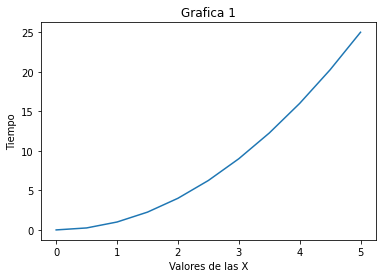

In [106]:
plt.plot(x,y) # graficar eje de las x (arreglo de numpy) y el eje de las y
plt.xlabel('Valores de las X')
plt.ylabel('Tiempo')
plt.title('Grafica 1')
plt.show()

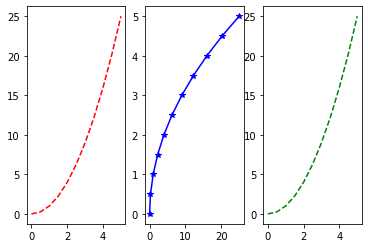

In [156]:
plt.subplot(1,3,1)
plt.plot(x,y,'r--') #graficar x, y, con una linea discontinua '--' de color rojo (r)
plt.subplot(1,3,2)
plt.plot(y,x,'b*-')
plt.subplot(1,3,3)
plt.plot(x,y,'g--')

## ORIENTADO OBJETOS - FORMA DE TRABAJAR MPL ->2

In [161]:
# Crear un objeto llamado figura
import matplotlib.pyplot as plt

#figsize=(15*cm, 5*cm) para hacerlo en centimetros

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Set Title')

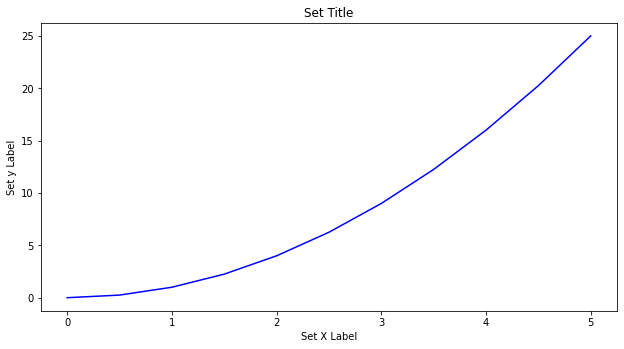

In [171]:
fig = plt.figure(figsize=(10,5))
#Agregar los ejes del graficos
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
#espacio desde la izquierda, desde la parte baja, el ancho, y el alto
#no son inches sin porcentaje o prorpocion respecto al canvas o figura
#me permite especificar el frame (marco) para los ejes del grafico
# los valores son entre 0 y 1
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') 
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

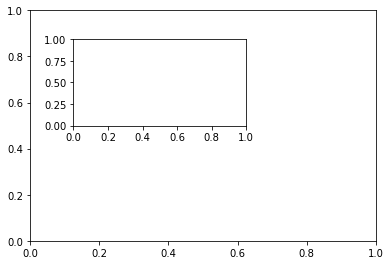

In [172]:
fig = plt.figure()

axes1 = fig.add_axes([0.1 , 0.1 , 0.8 ,0.8 ])

axes2 = fig.add_axes([0.2 , 0.5 , 0.4 ,0.3 ])

In [173]:
axes1.plot(x,y,'b')